# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# View JSON output
response = requests.get(url).json()
print(response)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

{'cod': '400', 'message': 'Nothing to geocode'}
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beaudesert
Processing Record 2 of Set 1 | mammoth lakes
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | raduzhny
Processing Record 5 of Set 1 | novouzensk
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | newman
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | kolobrzeg
Processing Record 17 of Set 1 | mezokovesd
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | celestun
Processing Record 21 of Set 1 | albany
Processing

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beaudesert,-27.9833,152.9833,19.49,58,92,0.80,AU,1718866208
1,mammoth lakes,37.6485,-118.9721,10.75,41,0,3.60,US,1718866208
2,stanley,54.8680,-1.6985,13.77,79,0,4.63,GB,1718866132
3,raduzhny,62.0961,77.4750,13.16,32,0,1.12,RU,1718866209
4,novouzensk,50.4592,48.1431,26.94,43,51,3.99,RU,1718866209


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beaudesert,-27.9833,152.9833,19.49,58,92,0.80,AU,1718866208
1,mammoth lakes,37.6485,-118.9721,10.75,41,0,3.60,US,1718866208
2,stanley,54.8680,-1.6985,13.77,79,0,4.63,GB,1718866132
3,raduzhny,62.0961,77.4750,13.16,32,0,1.12,RU,1718866209
4,novouzensk,50.4592,48.1431,26.94,43,51,3.99,RU,1718866209


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

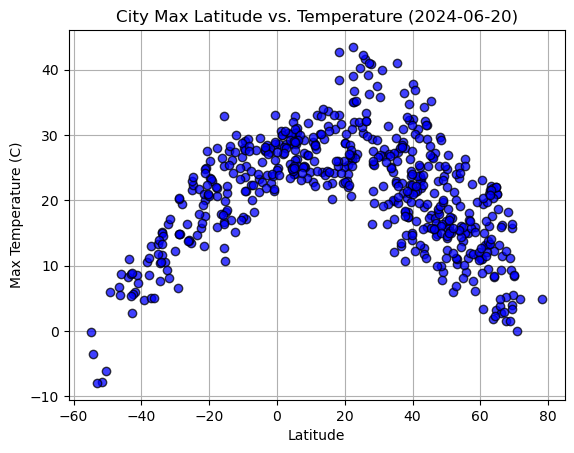

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", c="blue", linewidths=1, marker="o", alpha=0.75, label="Cities")
date = time.strftime("(%Y-%m-%d)")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature " + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(zorder=1)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

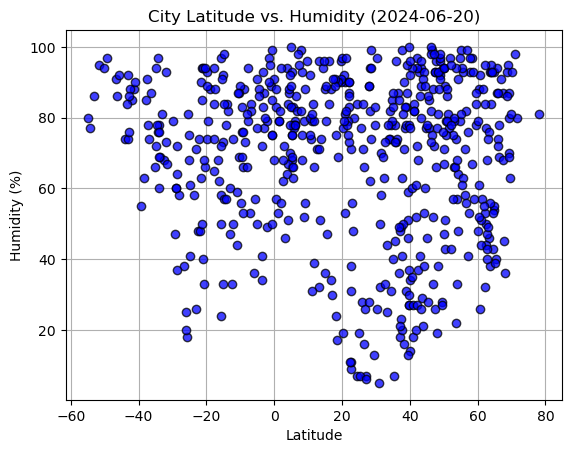

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.75, c='blue', label="Cities")

# Incorporate the other graph properties
date = time.strftime("(%Y-%m-%d)")
plt.title("City Latitude vs. Humidity " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(zorder=1)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

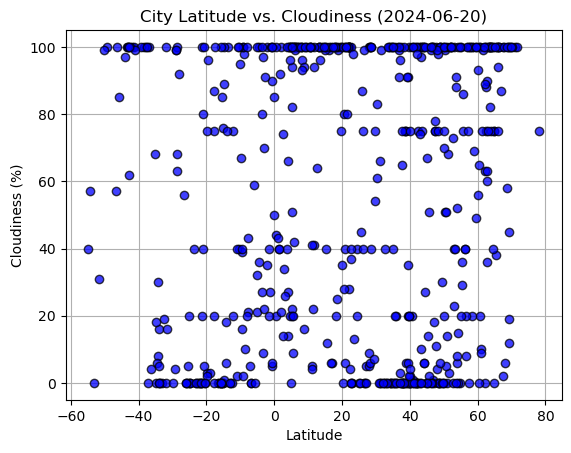

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.75, c='blue', label="Cities")

# Incorporate the other graph properties
date = time.strftime("(%Y-%m-%d)")
plt.title("City Latitude vs. Cloudiness " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(zorder=1)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

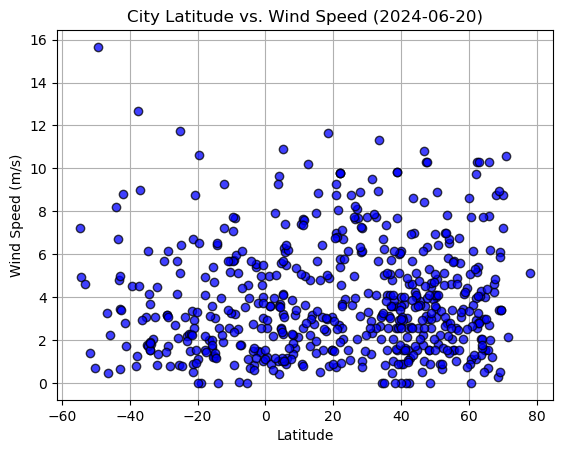

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.75, c='blue', label="Cities")

# Incorporate the other graph properties
date = time.strftime("(%Y-%m-%d)")
plt.title("City Latitude vs. Wind Speed " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(zorder=1)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, xlabel, ylabel, title):

    # Calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    reg_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", linewidths=1, marker="o", alpha=.75, c='blue', label="Cities")
    
    # Plot regression line
    plt.plot(x_values, reg_values, "r-", label=f"y={slope:.2f}x+{intercept:.2f}")

    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    legend = plt.legend()
    legend.get_frame().set_alpha(1.0)
    plt.grid(zorder=1)
    
    # Show plot
    plt.show()

    print(f"The r-value is {rvalue:.2f}")


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mammoth lakes,37.6485,-118.9721,10.75,41,0,3.60,US,1718866208
2,stanley,54.8680,-1.6985,13.77,79,0,4.63,GB,1718866132
3,raduzhny,62.0961,77.4750,13.16,32,0,1.12,RU,1718866209
4,novouzensk,50.4592,48.1431,26.94,43,51,3.99,RU,1718866209
6,newman,37.3138,-121.0208,21.13,49,0,0.45,US,1718866210


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beaudesert,-27.9833,152.9833,19.49,58,92,0.80,AU,1718866208
5,hermanus,-34.4187,19.2345,7.67,76,8,4.16,ZA,1718866209
9,adamstown,-25.0660,-130.1015,21.53,75,0,11.75,PN,1718866211
10,touros,-5.1989,-35.4608,23.27,91,21,4.56,BR,1718866211
11,ushuaia,-54.8000,-68.3000,-0.19,80,40,7.20,AR,1718866211


###  Temperature vs. Latitude Linear Regression Plot

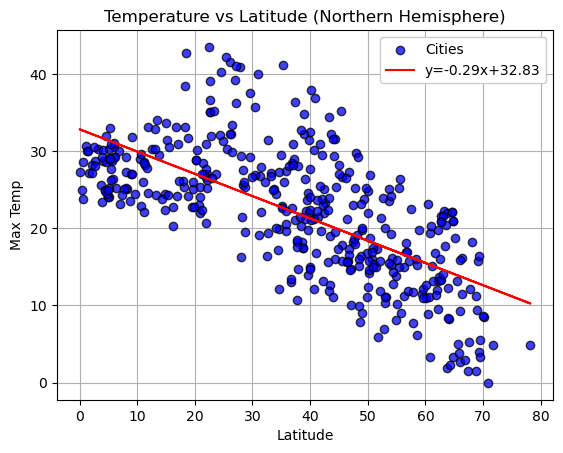

The r-value is -0.67


In [76]:
# Linear regression on Northern Hemisphere
linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'], 
    "Latitude",
    "Max Temp",
    "Temperature vs Latitude (Northern Hemisphere)"
    )

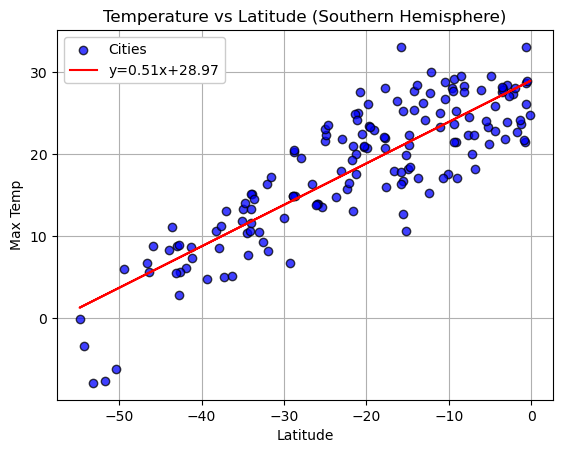

The r-value is 0.86


In [77]:
# Linear regression on Southern Hemisphere
linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'], 
    "Latitude",
    "Max Temp",
    "Temperature vs Latitude (Southern Hemisphere)"
    )

**Discussion about the linear relationship:** 

In both hemispheres, there is a clear linear relationship between latitude and maximum temperature, with the Northern Hemisphere showing a decrease in temperature with increasing latitude meaning the more north of the equator \(i.e., from 0 degrees latitude\) one gets \(e.g., towards the Artic Circle\) the colder the temperatures will be. As expected, the Southern Hemisphere shows an increase in temperature with increasing latitude, meaning the closer one is to the equator, the warmer temperatures will be. The r-values indicate a strong relationship between the two variables (latitude and temperatures).

### Humidity vs. Latitude Linear Regression Plot

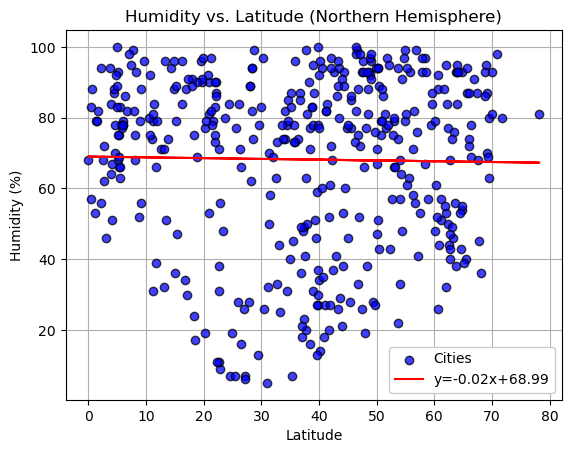

The r-value is -0.02


In [78]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'], 
    "Latitude",
    "Humidity (%)",
    "Humidity vs. Latitude (Northern Hemisphere)"
    )

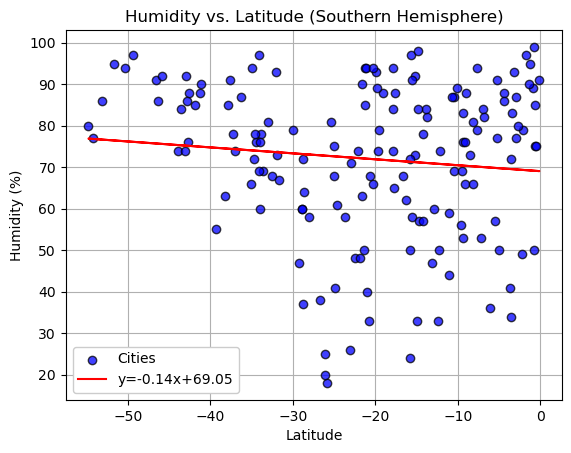

The r-value is -0.11


In [79]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'], 
    "Latitude",
    "Humidity (%)",
    "Humidity vs. Latitude (Southern Hemisphere)"
    )

**Discussion about the linear relationship:**

Both graphs are very scattered showing a weak linear relationships between latitude and humidity. The r-values indicate that latitude is not a strong determinant of humidity levels.
Humidity seems to be influenced by a variety of factors other than latitude, such as proximity to bodies of water, weather patterns, and local geography.

### Cloudiness vs. Latitude Linear Regression Plot

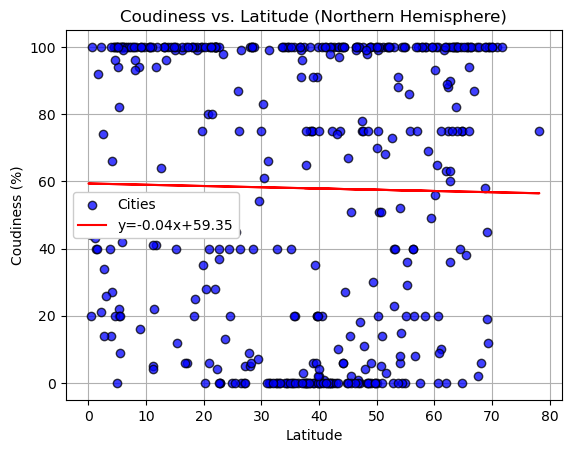

The r-value is -0.02


In [80]:
linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'], 
    "Latitude",
    "Coudiness (%)",
    "Coudiness vs. Latitude (Northern Hemisphere)"
    )

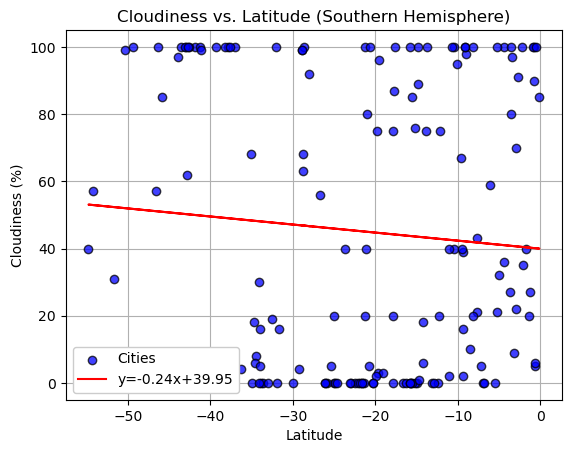

The r-value is -0.08


In [81]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'], 
    "Latitude",
    "Cloudiness (%)",
    "Cloudiness vs. Latitude (Southern Hemisphere)"
    )

**Discussion about the linear relationship:**

Both graphs are very scattered showing a weak linear relationships between latitude and cloudiness. This is not surprising as humidity and cloudiness are linked. The r-values indicate that latitude is not a strong determinant of cloudiness. Cloudiness seems to be influenced by a variety of factors other than latitude, such as proximity to bodies of water, weather patterns, and local geography.

### Wind Speed vs. Latitude Linear Regression Plot

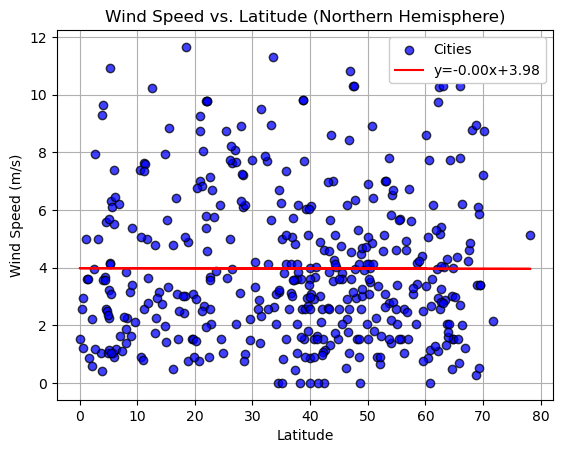

The r-value is -0.00


In [82]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'], 
    "Latitude",
    "Wind Speed (m/s)",
    "Wind Speed vs. Latitude (Northern Hemisphere)"
    )

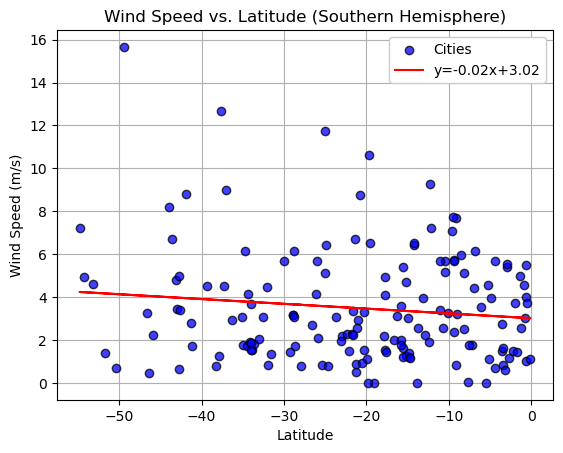

The r-value is -0.12


In [83]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'], 
    "Latitude",
    "Wind Speed (m/s)",
    "Wind Speed vs. Latitude (Southern Hemisphere)"
    )

**Discussion about the linear relationship:**

Both graphs are very scattered showing a weak linear relationships between latitude and wind speed. The r-values indicate that latitude is not a strong determinant of wind speeds. Rather, wind speed seems to be influenced by a variety of factors other than latitude.